In [1]:
import numpy as np
from numpy import e, pi, log, exp, sqrt, sin, arcsin, sinh, cos, tan, arctan, tanh, arctanh
import matplotlib.pyplot as plt

%matplotlib inline

# Chapter 6<br>Boundary Value Problems

## 7.1 Shooting Method

In [2]:
def RKF45(f, a, b, tol, y_0):
    h = b - a
    
    t_i = a
    w_i = np.array(y_0)
    t = [t_i]
    w = [w_i]
        
    k = 0 #############
    while t_i < b:
        k += 1 #############
        s_1 = f(t_i, w_i)
        s_2 = f(t_i + h/4, w_i + h*s_1/4)
        s_3 = f(t_i + h*3/8, w_i + h*s_1*3/32 + h*s_2*9/32)
        s_4 = f(t_i + h*12/13, w_i + h*s_1*1932/2197 - h*s_2*7200/2197 + 
                h*s_3*7296/2197)
        s_5 = f(t_i + h, w_i + h*s_1*439/216 - h*s_2*8 + h*s_3*3680/513 -
               h*s_4*845/4104)
        s_6 = f(t_i + h/2, w_i - h*s_1*8/27 + h*s_2*2 - h*s_3*3544/2565 + 
               h*s_4*1859/4104 - h*s_5*11/40)

        w_ii = w_i + h*(s_1*25/216 + s_3*1408/2565 + s_4*2197/4104 - s_5/5)
        z_ii = w_i + h*(s_1*16/135 + s_3*6656/12825 + s_4*28561/56430 -
                        s_5*9/50 + s_6*2/55)
        e_ii = abs(w_ii - z_ii)
        
        rel_error = abs(np.max(e_ii / w_ii))
        print(k, h, t_i) #############
        if rel_error > tol:
            print('A', k, rel_error) #############
            h *= 0.8 * pow(tol / rel_error, 1/5)
            continue
        elif t_i + h > b:
            print('B', k, rel_error) #############
            h = b - t_i
            continue

        t_i += h
        w_i = z_ii
        t.append(t_i)
        w.append(w_i)
        
        if (rel_error < tol/10) & (t_i + h < b):
            print('C', k, rel_error) #############
            h *= 2
    
    return t, np.array(w).T

In [3]:
def find_interval(f, a, b, tol, y_boundary, scope=10, count=1000):
    y_a, y_b = y_boundary

    for num in range(count):
        s_interval = 2*scope*np.random.rand(2) - scope
        s_interval.sort()
        test = 1

        for s in s_interval:
            y_0 = (y_a, s)
            t, y = RKF45(f, a, b, tol, y_0)
            test *= (y[0][-1] - y_b)

        if test < 0:
            return s_interval.tolist()
    
    return False

In [4]:
def Shooting(f, a, b, tol, y_boundary, s_interval):
    s0, s1 = s_interval
    y_a, y_b = y_boundary
    F_s = [0] * 2

    for i in range(2):
        s = s_interval[i]
        y_0 = (y_a, s)
        t, y = RKF45(f, a, b, tol, y_0)
        F_s[i] = y[0][-1] - y_b
    
    while True:
        c = (s0 + s1) / 2
        if s1 - s0 < tol:
            break;

        y_0 = (y_a, c)
        t, y = RKF45(f, a, b, tol, y_0)
        temp = y[0][-1] - y_b

        if temp * F_s[0] > 0:
            s0 = c
            F_s[0] = temp
            continue
        elif temp * F_s[1] > 0:
            s1 = c
            F_s[1] = temp
            continue
        else:
            break
    y_0 = (y_a, c)
    
    return RKF45(f, a, b, tol, y_0)

### Q. 1

In [32]:
tol = 1e-8

In [33]:
# (a)
a, b = 0, 1
y_boundary = 0, e/3

def f(t, y):
    y1, y2 = y
    equation = [y2, y1 + exp(t)*2/e]
    return np.array(equation)

Interval: [-1.1530, 3.5529]


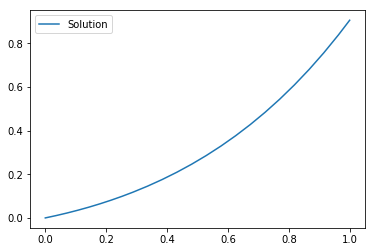

In [34]:
s_interval = find_interval(f, a, b, tol, y_boundary)
t, y = Shooting(f, a, b, tol, y_boundary, s_interval)

print("Interval: [%.4f, %.4f]" % (s_interval[0], s_interval[1]))

plt.plot(t, y[0], label="Solution")
plt.legend()
plt.show()

In [35]:
# (b)
a, b = 0, 1
y_boundary = 1, e

def f(t, y):
    y1, y2 = y
    equation = [y2, (2 + 4*t**2)*y1]
    return np.array(equation)

Interval: [-9.2601, 9.2800]


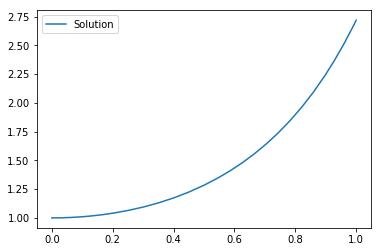

In [36]:
s_interval = find_interval(f, a, b, tol, y_boundary)
t, y = Shooting(f, a, b, tol, y_boundary, s_interval)

print("Interval: [%.4f, %.4f]" % (s_interval[0], s_interval[1]))

plt.plot(t, y[0], label="Solution")
plt.legend()
plt.show()

### Q. 2

In [37]:
tol = 1e-8

In [38]:
# (a)
a, b = 0, 3/2
y_boundary = -1, 3

def f(t, y):
    y1, y2 = y
    equation = [y2, -(pi**2 * y1) / 9]
    return np.array(equation)

Interval: [-8.5989, 5.2770]


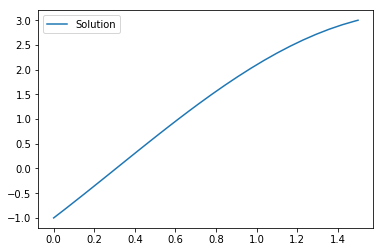

In [39]:
s_interval = find_interval(f, a, b, tol, y_boundary)
t, y = Shooting(f, a, b, tol, y_boundary, s_interval)

print("Interval: [%.4f, %.4f]" % (s_interval[0], s_interval[1]))

plt.plot(t, y[0], label="Solution")
plt.legend()
plt.show()

In [40]:
# (b)
a, b = 0, 1
y_boundary = exp(3), 1

def f(t, y):
    y1, y2 = y
    equation = [y2, 3*y1 - 2*y2]
    return np.array(equation)

Interval: [-86.3821, -34.2330]


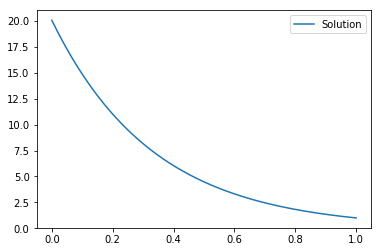

In [41]:
s_interval = find_interval(f, a, b, tol, y_boundary, scope=100)
t, y = Shooting(f, a, b, tol, y_boundary, s_interval)

print("Interval: [%.4f, %.4f]" % (s_interval[0], s_interval[1]))

plt.plot(t, y[0], label="Solution")
plt.legend()
plt.show()

### Q. 3

In [15]:
def RKF45(f, a, b, tol, y_0):
    h = b - a
    
    t_i = a
    w_i = np.array(y_0)
    t = [t_i]
    w = [w_i]
        
    k = 0 #############
    while t_i < b:
        k += 1 #############
        s_1 = f(t_i, w_i)
        s_2 = f(t_i + h/4, w_i + h*s_1/4)
        s_3 = f(t_i + h*3/8, w_i + h*s_1*3/32 + h*s_2*9/32)
        s_4 = f(t_i + h*12/13, w_i + h*s_1*1932/2197 - h*s_2*7200/2197 + 
                h*s_3*7296/2197)
        s_5 = f(t_i + h, w_i + h*s_1*439/216 - h*s_2*8 + h*s_3*3680/513 -
               h*s_4*845/4104)
        s_6 = f(t_i + h/2, w_i - h*s_1*8/27 + h*s_2*2 - h*s_3*3544/2565 + 
               h*s_4*1859/4104 - h*s_5*11/40)

        w_ii = w_i + h*(s_1*25/216 + s_3*1408/2565 + s_4*2197/4104 - s_5/5)
        z_ii = w_i + h*(s_1*16/135 + s_3*6656/12825 + s_4*28561/56430 -
                        s_5*9/50 + s_6*2/55)
        e_ii = abs(w_ii - z_ii)
        
        rel_error = abs(np.max(e_ii / w_ii))
        print(k, w_ii, rel_error) #############
        if rel_error > tol:
            print('A', k, rel_error) #############
            h *= 0.8 * pow(tol / rel_error, 1/5)
            continue
        elif t_i + h > b:
            print('B', k, rel_error) #############
            h = b - t_i
            continue

        t_i += h
        w_i = z_ii
        t.append(t_i)
        w.append(w_i)
        
        if (rel_error < tol/10) & (t_i + h < b):
            print('C', k, rel_error) #############
            h *= 2
    
    return t, np.array(w).T

In [16]:
tol = 1e-6

In [17]:
# (a)
a, b = 1, 2
y_boundary = 1/3, 1/12

def f(t, y):
    y1, y2 = y
    equation = [y2, 18*(y1**2)]
    return np.array(equation)

In [18]:
s_interval = find_interval(f, a, b, tol, y_boundary)
# t, y = Shooting(f, a, b, tol, y_boundary, s_interval)

# print("Interval: [%.4f, %.4f]" % (s_interval[0], s_interval[1]))

# plt.plot(t, y[0], label="Solution")
# plt.legend()
# plt.show()

1 [  0.59444039 -23.37186963] 2.5298164769913187
A 1 2.5298164769913187
2 [ 0.21808555 -2.723845  ] 2.1192446953300935e-07
3 [ 0.10441325 -2.70342774] 1.3039525280931098e-07
4 [-0.00884614 -2.70089849] 5.915253538370353e-08
C 4 5.915253538370353e-08
5 [-0.23468678 -2.67203269] 1.3975688731452973e-08
C 5 1.3975688731452973e-08
6 [-0.64401855 -2.02345827] 7.331054052501394e-05
A 6 7.331054052501394e-05
7 [-0.38414581 -2.5718897 ] 5.733576420852115e-07
8 [-0.52485229 -2.35794458] 1.0305715093631237e-06
A 8 1.0305715093631237e-06
9 [-0.49708266 -2.41267002] 3.31840313659919e-07
10 [-0.60089134 -2.16594267] 4.265474816112566e-07
11 [-0.69141679 -1.82440128] 4.684111730888366e-07
12 [-0.76440074 -1.3910916 ] 4.627878844642042e-07
13 [-0.81598049 -0.8805089 ] 4.0308034850309493e-07
14 [-0.84319536 -0.31775568] 2.9156998475605007e-07
15 [-0.84440632  0.26444479] 1.037110182930763e-05
A 15 1.037110182930763e-05
16 [-0.84709507 -0.0262239 ] 3.6790141471631847e-09
C 16 3.6790141471631847e-09
17 [

233 [1.24746614e+11 1.52627665e+17] 3.3317580128606154e-07
234 [1.42786164e+11 1.86904286e+17] 4.5562025956835126e-07
235 [1.65041623e+11 2.32263080e+17] 6.36210746586083e-07
236 [1.92936840e+11 2.93570531e+17] 9.098338259389187e-07
237 [2.28551739e+11 3.78500192e+17] 1.3374539600722201e-06
A 237 1.3374539600722201e-06
238 [2.18957753e+11 3.54920107e+17] 3.3317580127253294e-07
239 [2.50621132e+11 4.34626901e+17] 4.5562025967163396e-07
240 [2.89684360e+11 5.40104162e+17] 6.362107466647726e-07
241 [3.38646603e+11 6.82668403e+17] 9.098338260564433e-07
242 [4.01158586e+11 8.80163688e+17] 1.3374539602942548e-06
A 242 1.3374539602942548e-06
243 [3.84319031e+11 8.25330601e+17] 3.3317580130390635e-07
244 [4.39895228e+11 1.01068064e+18] 4.5562025969956863e-07
245 [5.08459787e+11 1.25595728e+18] 6.362107465237418e-07
246 [5.94399295e+11 1.58747592e+18] 9.098338259630844e-07
247 [7.04121579e+11 2.04673111e+18] 1.3374539604855868e-06
A 247 1.3374539604855868e-06
248 [6.74564454e+11 1.91922235e+18]

764 [1.13196173e+37 1.31928215e+56] 4.5562025968098864e-07
765 [1.30839569e+37 1.63945162e+56] 6.362107463522626e-07
766 [1.52953979e+37 2.07219626e+56] 9.098338258685063e-07
767 [1.81188299e+37 2.67168056e+56] 1.3374539601253636e-06
A 767 1.3374539601253636e-06
768 [1.73582503e+37 2.50523823e+56] 3.3317580132317466e-07
769 [1.98684188e+37 3.06785642e+56] 4.556202597101454e-07
770 [2.29652230e+37 3.81237796e+56] 6.362107463174136e-07
771 [2.68467885e+37 4.81868158e+56] 9.098338260168443e-07
772 [3.18025328e+37 6.21272133e+56] 1.3374539603676265e-06
A 772 1.3374539603676265e-06
773 [3.04675483e+37 5.82567663e+56] 3.331758011971331e-07
774 [3.48734463e+37 7.13398798e+56] 4.556202595946612e-07
775 [4.03090190e+37 8.86529708e+56] 6.362107464311432e-07
776 [4.71220204e+37 1.12053538e+57] 9.098338260017981e-07
777 [5.58204421e+37 1.44470514e+57] 1.3374539599996571e-06
A 777 1.3374539599996571e-06
778 [5.34772505e+37 1.35470183e+57] 3.3317580119309115e-07
779 [6.12105710e+37 1.65893633e+57] 4

1377 [1.16568381e+067 1.37867041e+101] 1.3374539602588856e-06
A 1377 1.3374539602588856e-06
1378 [1.11675154e+067 1.29278098e+101] 3.3317580136821214e-07
1379 [1.27824447e+067 1.58310950e+101] 4.5562025970132977e-07
1380 [1.47747888e+067 1.96730581e+101] 6.362107464451823e-07
1381 [1.72720130e+067 2.48658983e+101] 9.098338257594665e-07
1382 [2.04603155e+067 3.20595778e+101] 1.3374539602138586e-06
A 1382 1.3374539602138586e-06
1383 [1.96014466e+067 3.00623065e+101] 3.331758013830621e-07
1384 [2.24360027e+067 3.68136008e+101] 4.5562025951698003e-07
1385 [2.59330051e+067 4.57476952e+101] 6.362107464091029e-07
1386 [3.03161830e+067 5.78231167e+101] 9.098338258666614e-07
1387 [3.59123552e+067 7.45512864e+101] 1.3374539601078173e-06
A 1387 1.3374539601078173e-06
1388 [3.44048514e+067 6.99068354e+101] 3.331758012585726e-07
1389 [3.93801211e+067 8.56062832e+101] 4.556202596386659e-07
1390 [4.55181296e+067 1.06381611e+102] 6.362107465392169e-07
1391 [5.32115711e+067 1.34461775e+102] 9.098338258

1949 [9.12876524e+094 9.55450363e+142] 4.556202597028739e-07
1950 [1.05516263e+095 1.18732346e+143] 6.362107465599243e-07
1951 [1.23350545e+095 1.50072573e+143] 9.0983382597071e-07
1952 [1.46120262e+095 1.93488418e+143] 1.3374539603516997e-06
A 1952 1.3374539603516997e-06
1953 [1.39986528e+095 1.81434334e+143] 3.3317580119037106e-07
1954 [1.60229915e+095 2.22180261e+143] 4.556202597410651e-07
1955 [1.85204256e+095 2.76099992e+143] 6.362107464425606e-07
1956 [2.16507346e+095 3.48978501e+143] 9.098338259194187e-07
1957 [2.56473209e+095 4.49937631e+143] 1.3374539600668315e-06
A 1957 1.3374539600668315e-06
1958 [2.45707155e+095 4.21907084e+143] 3.3317580138388696e-07
1959 [2.81238753e+095 5.16657594e+143] 4.556202598041516e-07
1960 [3.25074217e+095 6.42042441e+143] 6.362107466249897e-07
1961 [3.80018027e+095 8.11513999e+143] 9.098338259824918e-07
1962 [4.50166909e+095 1.04628418e+144] 1.3374539603048342e-06
A 1962 1.3374539603048342e-06
1963 [4.31270116e+095 9.81102001e+143] 3.331758011798

2431 [3.52347397e+118 2.29111199e+178] 9.098338259274587e-07
2432 [4.17388458e+118 2.95392839e+178] 1.3374539604593955e-06
A 2432 1.3374539604593955e-06
2433 [3.99867617e+118 2.76990238e+178] 3.331758011937417e-07
2434 [4.57692288e+118 3.39195798e+178] 4.556202595725464e-07
2435 [5.29030798e+118 4.21513398e+178] 6.362107462783631e-07
2436 [6.18447203e+118 5.32774784e+178] 9.098338258276011e-07
2437 [7.32608576e+118 6.86905995e+178] 1.3374539600492511e-06
A 2437 1.3374539600492511e-06
2438 [7.01855644e+118 6.44112619e+178] 3.3317580136307483e-07
2439 [8.03350664e+118 7.88765319e+178] 4.5562025963523923e-07
2440 [9.28565444e+118 9.80186523e+178] 6.362107465658502e-07
2441 [1.08551091e+119 1.23891356e+179] 9.098338258135972e-07
2442 [1.28588924e+119 1.59733001e+179] 1.3374539602381647e-06
A 2442 1.3374539602381647e-06
2443 [1.23191107e+119 1.49781836e+179] 3.3317580128967255e-07
2444 [1.41005716e+119 1.83419350e+179] 4.556202595910272e-07
2445 [1.62983665e+119 2.27932404e+179] 6.362107462

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in multiply


[9.95224242e+149 3.43931038e+225] 6.36210746434206e-07
3076 [1.16343633e+150 4.34714022e+225] 9.09833826061321e-07
3077 [1.37819919e+150 5.60476352e+225] 1.3374539603505575e-06
A 3077 1.3374539603505575e-06
3078 [1.32034610e+150 5.25559383e+225] 3.33175801260627e-07
3079 [1.51128074e+150 6.43587786e+225] 4.556202595317026e-07
3080 [1.74683751e+150 7.99776637e+225] 6.362107465042898e-07
3081 [2.04208673e+150 1.01088323e+226] 9.098338258961547e-07
3082 [2.41904280e+150 1.30333074e+226] 1.3374539600468307e-06
A 3082 1.3374539600468307e-06
3083 [2.31749790e+150 1.22213488e+226] 3.331758013539844e-07
3084 [2.65263020e+150 1.49659792e+226] 4.5562025973705873e-07
3085 [3.06608416e+150 1.85979920e+226] 6.362107464890297e-07
3086 [3.58431150e+150 2.35070611e+226] 9.098338261469628e-07
3087 [4.24595233e+150 3.03076303e+226] 1.337453960329631e-06
A 3087 1.337453960329631e-06
3088 [4.06771870e+150 2.84195032e+226] 3.331758014229377e-07
3089 [4.65594962e+150 3.48018620e+226] 4.5562025954686463e-07


C 3445 0.0
3446 [1.65797693e+151 2.33861117e+227] 0.0
C 3446 0.0
3447 [1.65797693e+151 2.33861117e+227] 0.0
C 3447 0.0
3448 [1.65797693e+151 2.33861117e+227] 0.0
C 3448 0.0
3449 [1.65797693e+151 2.33861117e+227] 0.0
C 3449 0.0
3450 [1.65797693e+151 2.33861117e+227] 0.0
C 3450 0.0
3451 [1.65797693e+151 2.33861117e+227] 0.0
C 3451 0.0
3452 [1.65797693e+151 2.33861117e+227] 0.0
C 3452 0.0
3453 [1.65797693e+151 2.33861117e+227] 0.0
C 3453 0.0
3454 [1.65797693e+151 2.33861117e+227] 0.0
C 3454 0.0
3455 [1.65797693e+151 2.33861117e+227] 0.0
C 3455 0.0
3456 [1.65797693e+151 2.33861117e+227] 0.0
C 3456 0.0
3457 [1.65797693e+151 2.33861117e+227] 0.0
C 3457 0.0
3458 [1.65797693e+151 2.33861117e+227] 0.0
C 3458 0.0
3459 [1.65797693e+151 2.33861117e+227] 0.0
C 3459 0.0
3460 [1.65797693e+151 2.33861117e+227] 0.0
C 3460 0.0
3461 [1.65797693e+151 2.33861117e+227] 0.0
C 3461 0.0
3462 [1.65797693e+151 2.33861117e+227] 0.0
C 3462 0.0
3463 [1.65797693e+151 2.33861117e+227] 0.0
C 3463 0.0
3464 [1.65797693e

C 3715 0.0
3716 [1.65797693e+151 2.33861117e+227] 0.0
C 3716 0.0
3717 [1.65797693e+151 2.33861117e+227] 0.0
C 3717 0.0
3718 [1.65797693e+151 2.33861117e+227] 0.0
C 3718 0.0
3719 [1.65797693e+151 2.33861117e+227] 0.0
C 3719 0.0
3720 [1.65797693e+151 2.33861117e+227] 0.0
C 3720 0.0
3721 [1.65797693e+151 2.33861117e+227] 0.0
C 3721 0.0
3722 [1.65797693e+151 2.33861117e+227] 0.0
C 3722 0.0
3723 [1.65797693e+151 2.33861117e+227] 0.0
C 3723 0.0
3724 [1.65797693e+151 2.33861117e+227] 0.0
C 3724 0.0
3725 [1.65797693e+151 2.33861117e+227] 0.0
C 3725 0.0
3726 [1.65797693e+151 2.33861117e+227] 0.0
C 3726 0.0
3727 [1.65797693e+151 2.33861117e+227] 0.0
C 3727 0.0
3728 [1.65797693e+151 2.33861117e+227] 0.0
C 3728 0.0
3729 [1.65797693e+151 2.33861117e+227] 0.0
C 3729 0.0
3730 [1.65797693e+151 2.33861117e+227] 0.0
C 3730 0.0
3731 [1.65797693e+151 2.33861117e+227] 0.0
C 3731 0.0
3732 [1.65797693e+151 2.33861117e+227] 0.0
C 3732 0.0
3733 [1.65797693e+151 2.33861117e+227] 0.0
C 3733 0.0
3734 [1.65797693e

C 4027 0.0
4028 [1.65797693e+151 2.33861117e+227] 0.0
C 4028 0.0
4029 [1.65797693e+151 2.33861117e+227] 0.0
C 4029 0.0
4030 [1.65797693e+151 2.33861117e+227] 0.0
C 4030 0.0
4031 [1.65797693e+151 2.33861117e+227] 0.0
C 4031 0.0
4032 [1.65797693e+151 2.33861117e+227] 0.0
C 4032 0.0
4033 [1.65797693e+151 2.33861117e+227] 0.0
C 4033 0.0
4034 [1.65797693e+151 2.33861117e+227] 0.0
C 4034 0.0
4035 [1.65797693e+151 2.33861117e+227] 0.0
C 4035 0.0
4036 [1.65797693e+151 2.33861117e+227] 0.0
C 4036 0.0
4037 [1.65797693e+151 2.33861117e+227] 0.0
C 4037 0.0
4038 [1.65797693e+151 2.33861117e+227] 0.0
C 4038 0.0
4039 [1.65797693e+151 2.33861117e+227] 0.0
C 4039 0.0
4040 [1.65797693e+151 2.33861117e+227] 0.0
C 4040 0.0
4041 [1.65797693e+151 2.33861117e+227] 0.0
C 4041 0.0
4042 [1.65797693e+151 2.33861117e+227] 0.0
C 4042 0.0
4043 [1.65797693e+151 2.33861117e+227] 0.0
C 4043 0.0
4044 [1.65797693e+151 2.33861117e+227] 0.0
C 4044 0.0
4045 [1.65797693e+151 2.33861117e+227] 0.0
C 4045 0.0
4046 [1.65797693e

KeyboardInterrupt: 

In [79]:
# (b)
a, b = 0, 1
y_boundary = 0, log(2)

def f(t, y):
    y1, y2 = y
    equation = [y2, 2*exp(-2*y1)*(1 - t**2)]
    return np.array(equation)

In [80]:
s_interval = find_interval(f, a, b, tol, y_boundary)
t, y = Shooting(f, a, b, tol, y_boundary, s_interval)

print("Interval: [%.4f, %.4f]" % (s_interval[0], s_interval[1]))

plt.plot(t, y[0], label="Solution")
plt.legend()
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


KeyboardInterrupt: 